In [38]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist


def load_data():
    with np.load('datasets/mnist.npz') as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train),(x_test, y_test) = load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)
#model.save('test_model.data')

Epoch 1/1
10000/10000 [==============================] - 1s 138us/step


[0.11769596570283175, 0.9627]

In [58]:
r = model.predict(x_test[:1])
print(r[0])
np.argmax(r[0])
#dir(t)

[4.5061438e-06 1.7789303e-07 2.8179371e-04 2.4415931e-04 2.4928946e-08
 1.6237440e-06 2.2182616e-09 9.9944729e-01 2.1934586e-06 1.8357112e-05]


7

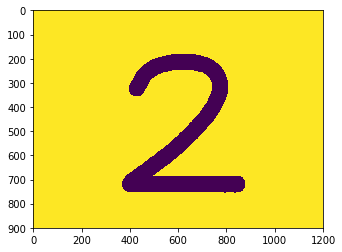

In [4]:
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
img = cv2.imread('testsets/num_2.png',1)

# cvtColor方法: 图片，转换模式: BGR转换为灰度(颜色空间转换)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)# 颜色空间转换 1 data 2 BGR gray
plt.imshow(gray)
#plt.title('my picture')
#plt.show()


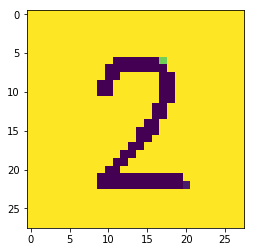

In [5]:
resized_image = cv2.resize(gray, (28, 28)) 
plt.imshow(resized_image)

In [6]:
predicted = model.predict(resized_image)


NameError: name 'model' is not defined

In [7]:
import tensorflow as tf
import numpy as np
new_model = tf.keras.models.load_model('test_model.data')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


(900, 1200, 3)

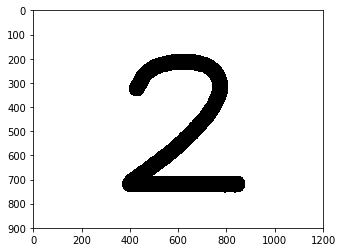

In [25]:
img = cv2.imread('testsets/num_2.png',1)
plt.imshow(img)
#gray
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(gray)
gray = img
gray.shape


ValueError: cannot reshape array of size 2352 into shape (1,28,28)

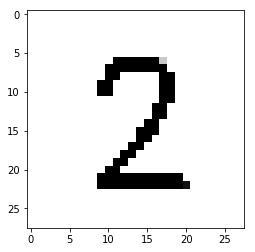

In [24]:
#resize
resized_image = cv2.resize(gray, (28, 28)) 
plt.imshow(resized_image)
#reshape
after = np.reshape(resized_image,(1,28,28))
after = after / 255.0
predicted = new_model.predict(after)
np.argmax(predicted)

In [58]:
img = cv2.imread('testsets/num_6.png')
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = 255-img
z = np.zeros([28,28])
print(gray_img.shape)
resized_image = cv2.resize(gray_img, (28, 28)) 
for x in range(28):
    for y in range(28):
        z[x][y] = sum(resized_image[x][y])//3
print(z.shape)
#print(z)
after = np.reshape(z,(1,28,28))
after = after / 255.0
#print(after)
predicted = new_model.predict(after)
np.argmax(predicted)

(900, 1200, 3)
(28, 28)


6

In [40]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    